In [194]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import operator
import random
import pickle

In [187]:
#reading data

data = pd.read_csv('casts.csv', sep=None, delimiter=None, header=None,  index_col=None, engine='python')

data = data.drop([0, 3,4], 1)

data.rename(columns={1:'movie', 2:'actor'}, inplace=True)

print(len(data))

data.dropna(inplace=True)
data.head()

46233


,movie,actor
0,Pygmalion,Leslie Howard
1,Pygmalion,Wendy Hiller
2,Pygmalion,Wilfrid Lawson
3,Pygmalion,Scott Sunderland
4,Pygmalion,Marie Lohr


In [85]:
#lists

actors=list(data.actor.unique())

movies=list(data.movie.unique())

actors.remove('s a')

actors.remove('s a<')

In [87]:
#adding nodes

for a in actors:
    G.add_node(a)

In [88]:
#adding edges

for m in movies:
    a=[]
    a=list(data.loc[data['movie']==m]['actor'])
    comb=itertools.combinations(a, 2)
    for c in comb:
        G.add_edges_from([c])

In [89]:
#num nodes, num edges

print(len(G.nodes()))
print(len(G.edges()))

16612
155956


In [90]:
G.to_undirected()

In [91]:
#density

D=2*len(G.edges())/(len(G.nodes())*(len(G.nodes())-1))
print(D)

0.0011303537586306383


In [197]:
#num of connected components

cc=list(nx.connected_components(G))
len(cc)

638

In [97]:
#centralities

centralities=[]
centralities.append(nx.degree_centrality(G)) 
                
#centralities = [nx.degree_centrality(G), nx.closeness_centrality(G),
# nx.betweenness_centrality(G), nx.eigenvector_centrality(G)]

centralities.append(nx.closeness_centrality(G))

centralities.append(nx.betweenness_centrality(G))

In [99]:
pickle.dump(centralities, open( "cent.p", "wb" ) )

In [100]:
#key-players

x=[]
for i in range(0, len(centralities)):
    sorted_x = sorted(centralities[i].items(), key=operator.itemgetter(1))
    sorted_x=sorted_x[-6:-1]
    x.append(sorted_x)
    print(sorted_x)

[('John Carradine', 0.022093793269520195), ('John Gielgud', 0.022274396484257417), ('Gary Cooper', 0.022274396484257417), ('James Stewart', 0.022515200770573715), ('Humphrey Bogart', 0.025886460779001867)]
[('Henry Fonda', 0.3657625304979758), ('Burt Lancaster', 0.3664207124748073), ('John Carradine', 0.3665880908097189), ('John Gielgud', 0.3669233066423135), ('Charlton Heston', 0.36836975881775835)]
[('Burt Lancaster', 0.006560412804489521), ('Jack Nicholson', 0.006674886024668864), ('John Carradine', 0.007040082232818531), ('Vincent Price', 0.007789538837495188), ('Humphrey Bogart', 0.008275678664201517)]


In [203]:
communities = nx.clustering(G)
print(len(communities))

16612


In [201]:
#saving attr

nx.set_node_attributes(G, 'deg_cent', centralities[0])


nx.set_node_attributes(G, 'clos_cent', centralities[1])
nx.set_node_attributes(G, 'bet_cent', centralities[2])

nx.set_node_attributes(G, 'kb-num', kb)

nx.set_node_attributes(G, 'clust_coeff', communities)

In [202]:
#saving the graph

nx.write_gexf(G, "cast.gexf")

In [128]:
#kevin bacon number

kb={}
for i in range(0, 500):
    a= random.choice(actors)
    if nx.has_path(G, 'Kevin Bacon', a):
        kb[a]=nx.shortest_path_length(G, 'Kevin Bacon', a, 1)
        
sorted_kb = sorted(kb.items(), key=operator.itemgetter(1))


In [129]:
#least kb number, biggest number

print(sorted_kb[:5])
print(sorted_kb[-6:-1])


[('J.A. Preston', 1), ('Tommy Lee Jones', 1), ('Deborah Thompson', 1), ('Cathy Moriarty', 1), ('John C. Relly', 1)]
[('Alfons Haider', 5), ('Ula Holt', 5), ('Brandy', 5), ('Grant Cramer', 5), ('Kaethe vonNagy', 5)]


In [130]:
# average kb

sums=0
for i in range(0, len(sorted_kb)):
    sums+=sorted_kb[i][1]
print(float(sums)/len(sorted_kb))

2.7963800904977374


In [171]:
#visualization of randomly chosen 7 movie actors

G1=nx.Graph()

for i in range(0, 7):
    m = random.choice(movies)
    a=list(data.loc[data['movie']==m]['actor'])
    for aa in a:
        if aa not in G1.nodes():
            G1.add_node(aa)
    comb=itertools.combinations(a, 2)
    for c in comb:
        G1.add_edges_from([c])

G1.to_undirected()



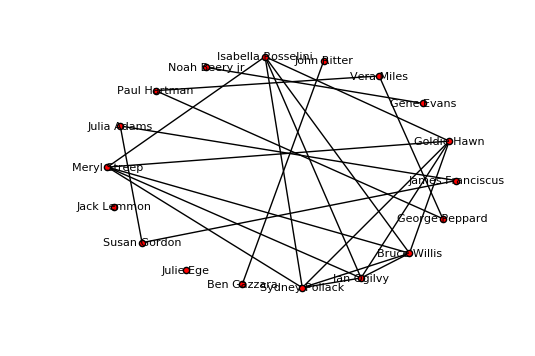

In [178]:
nx.draw_networkx(G1, pos=nx.spring_layout(G1, k=1, scale=3), node_size=20, font_size=8)
plt.axis('off')
plt.show()